<p>
<img src="http://www.cerm.unifi.it/chianti/images/logo%20unifi_positivo.jpg" 
        alt="UniFI logo" style="float: left; width: 20%; height: 20%;">
<div align="right">
Massimo Nocentini<br>
<small>
<br>November 9, 2016: splitting from "big" notebook
</small>
</div>
</p>
<br>
<br>
<div align="center">
<b>Abstract</b><br>
Theory of matrix functions, with applications to Pascal array $\mathcal{P}$.
</div>

In [8]:
from sympy import *
from sympy.abc import n, i, N, x, lamda, phi, z, j, r, k, a

init_printing()

In [13]:
%run ../../src/matrix_functions.py

# Pascal array $\mathcal{P}$

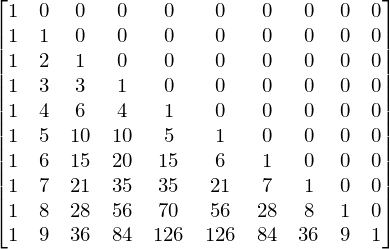

In [21]:
m = Matrix(10,10,binomial)
m

In [22]:
data, eigenvals, multiplicities = eigendata = eigen_data(m)
eigendata

In [23]:
m_bar = 10 # degree of \Xi minimal polynomial
Phi_poly = Phi_poly_ctor(deg=m_bar-1)
Phi_poly

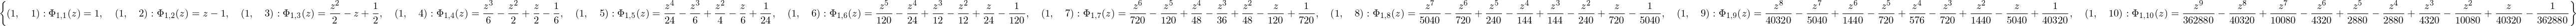

In [24]:
Phi_polynomials = component_polynomials_riordan(m_bar)
Phi_polynomials

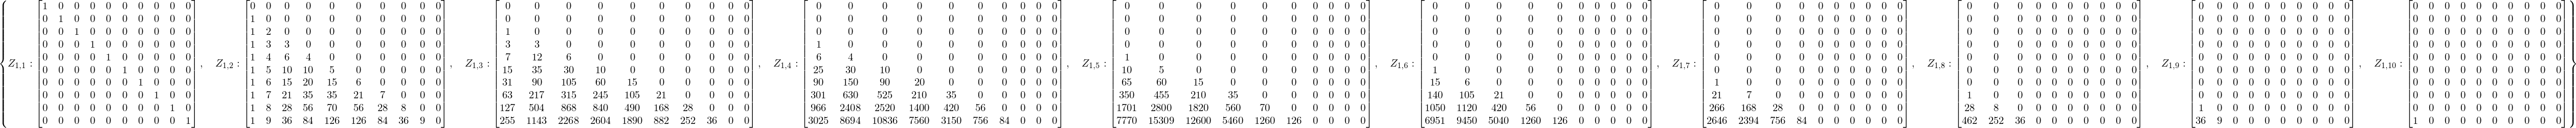

In [26]:
Z = IndexedBase('Z')

cmatrices = component_matrices(m, Phi_polynomials)
{Z[k]:v for k,v in cmatrices.items()}

## `inverse` function

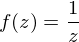

In [29]:
f, h = Function('f'), Function('h')
f_inverse = define(let=f(z), be=1/(z))
f_inverse

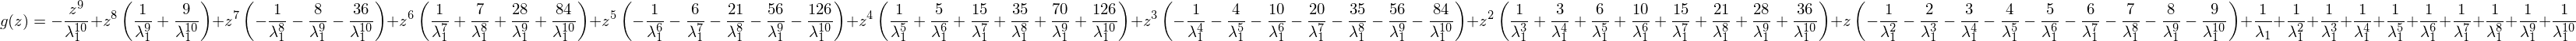

In [30]:
g_inverse = g_poly(f_inverse, eigendata, Phi_polynomials)
g_inverse

In [31]:
g_inverse = g_inverse.subs(eigenvals)
g_inverse

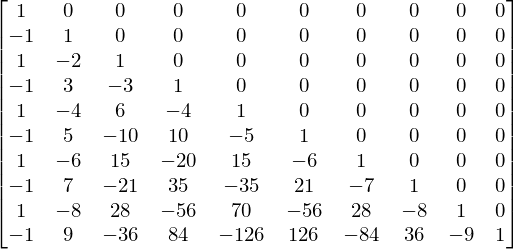

In [32]:
with lift_to_matrix_function(g_inverse) as g_inverse:
    m_inverse = g_inverse(m)
m_inverse

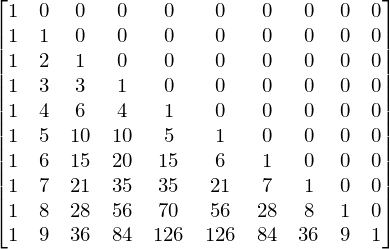

In [34]:
g_inverse(m_inverse)

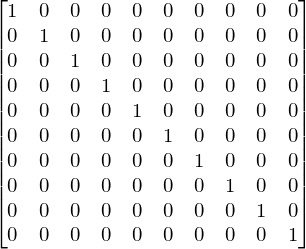

In [33]:
m_inverse*m

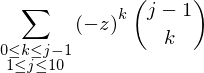

In [35]:
Sum(Sum(binomial(j-1, k)*(-z)**k, (k, 0, j-1)), (j, 1, m.rows))

In [36]:
sum(binomial(j-1, k)*(-z)**k for j in range(1, m.rows+1) for k in range(j))

In [37]:
sum(binomial(m.rows, i)*(-z)**(i-1) for i in range(1, m.rows+1))

In [38]:
sum(binomial(m.rows, i+1)*(-z)**(i) for i in range(m.rows))

## `power` function

In [39]:
f, h = Function('f'), Function('h')
f_power = define(let=f(z), be=z**r)
f_power

In [54]:
g_power = g_poly(f_power, eigendata, Phi_polynomials)

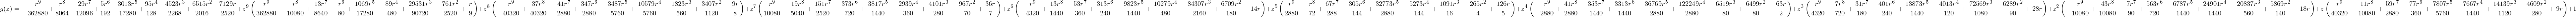

In [55]:
g_power = g_power.subs(eigenvals)
g_power

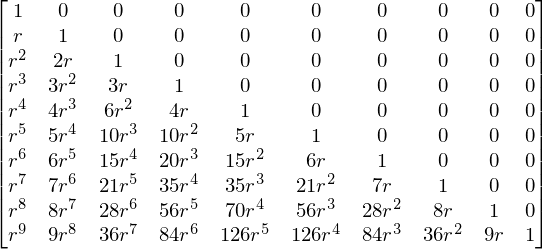

In [42]:
with lift_to_matrix_function(g_power) as g_power:
    m_power = g_power(m)
m_power

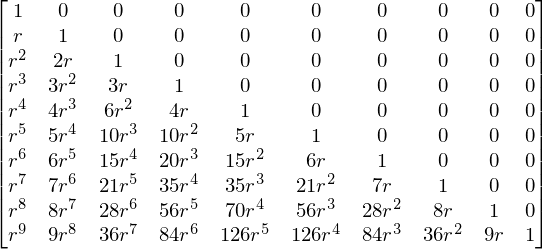

In [43]:
(m**r).applyfunc(simplify)

---

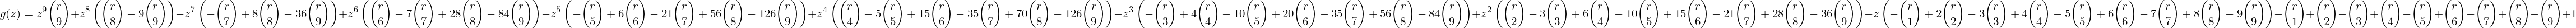

In [51]:
g_power = define(Function('g')(z), sum(sum((-1)**(j)*binomial(j, i, evaluate=True)*binomial(r, j) for j in range(i, m.rows))*(-z)**(i) for i in range(m.rows)))
g_power

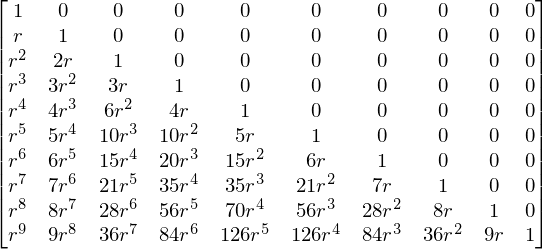

In [46]:
with lift_to_matrix_function(g_power) as g_power:
    m_power = g_power(m)
m_power

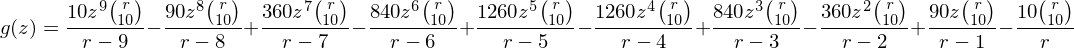

In [50]:
g_power = define(Function('g')(z), sum((-1)**(m.rows)*(i-m.rows)/(r-i)*binomial(m.rows, i)*binomial(r, m.rows)*(-z)**(i) for i in range(m.rows)))
g_power

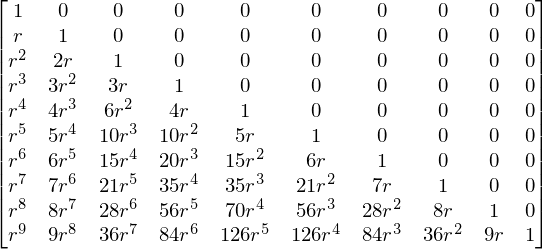

In [48]:
with lift_to_matrix_function(g_power) as g_power:
    m_power = g_power(m)
m_power

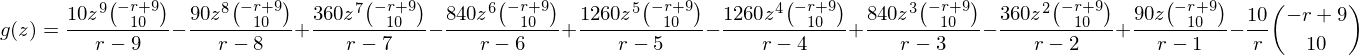

In [52]:
g_power = define(Function('g')(z), sum(binomial(m.rows-r-1, m.rows) *(i-m.rows)/(r-i)*binomial(m.rows, i)*(-z)**(i) for i in range(m.rows)))
g_power

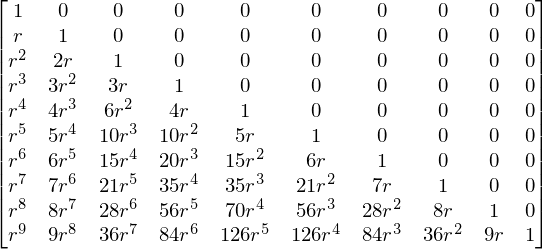

In [53]:
with lift_to_matrix_function(g_power) as g_power:
    m_power = g_power(m)
m_power

## `sqrt` function

In [57]:
f, h = Function('f'), Function('h')
f_sqrt = define(let=f(z), be=sqrt(z))
f_sqrt

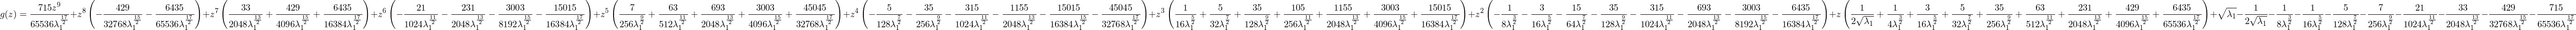

In [58]:
g_sqrt = g_poly(f_sqrt, eigendata, Phi_polynomials)
g_sqrt

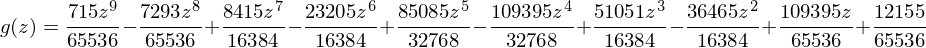

In [59]:
g_sqrt = g_sqrt.subs(eigenvals)
g_sqrt

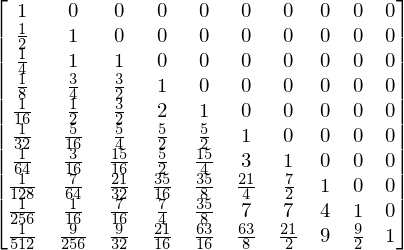

In [61]:
with lift_to_matrix_function(g_sqrt) as g_sqrt:
    m_sqrt = g_sqrt(m)
m_sqrt

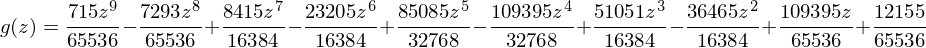

In [62]:
g_sqrt = define(Function('g')(z), 1 + 
       sum(sum(-S(1)/(j*4**(j-1))*binomial(2*(j-1), j-1)*binomial(j, i) for j in range(i, m.rows))*(-z)**(i) for i in range(1,m.rows))/2 
      +sum(-S(1)/(j*4**(j-1))*binomial(2*(j-1), j-1) for j in range(1,m.rows))/S(2))
g_sqrt

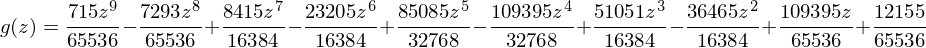

In [63]:
g_sqrt = define(Function('g')(z), 1 + 
       sum(sum(-S(1)/(j*4**(j-1))*binomial(2*(j-1), j-1)*binomial(j, i) for j in range(i+KroneckerDelta(i,0), m.rows))*(-z)**(i) for i in range(m.rows))/2)
g_sqrt

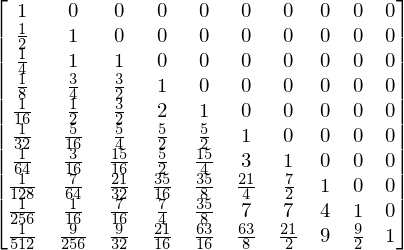

In [64]:
m**(S(1)/2)

---
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.